In [1]:
#%% load data
from sklearn import datasets
boston = datasets.load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [2]:
# summary of data
feature = boston.data
price = boston.target
print('data size = ', feature.shape)
print('target size = ', price.shape)
print('feature attributes: ', boston.feature_names)
print(boston.DESCR)

data size =  (506, 13)
target size =  (506,)
feature attributes:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employme

In [3]:
# more details of data
import pandas as pd
df_feature = pd.DataFrame(feature, columns = boston.feature_names)
df_target = pd.DataFrame(price, columns =['MEDV'])
df_boston = pd.concat([df_feature, df_target,], axis = 1)

In [4]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# 2.1 how does each feature relate to the price
import matplotlib.pyplot as plt
plt.figure()
fig,axes = plt.subplots(4, 4, figsize=(14,18))
fig.subplots_adjust(wspace=.4, hspace=.4)
img_index = 0
for i in range(boston.feature_names.size):
    row, col = i // 4, i % 4
    axes[row][col].scatter(feature[:,i], price)
    axes[row][col].set_title(boston.feature_names[i] + ' and MEDV')
    axes[row][col].set_xlabel(boston.feature_names[i])        
    axes[row][col].set_ylabel('MEDV (price)')
plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 1400x1800 with 16 Axes>

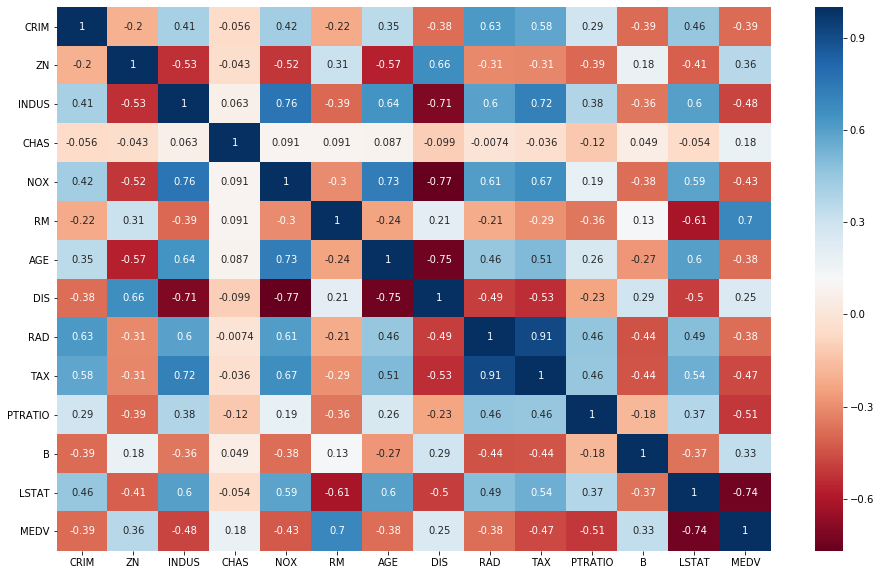

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [7]:
# 2.2 correlation matrix
import seaborn as sns
fig, ax = plt.subplots(figsize=(16, 10))
correlation = df_boston.corr()
sns.heatmap(correlation, annot = True, cmap = 'RdBu')
plt.show()
correlation

In [8]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, price, test_size=0.3, random_state=8)

In [9]:
# 2.3 linear regression and ridge regression
import numpy as np
def least_square(X, y):
    #theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)
    return theta

def ridge_reg(X, y, eta):
    n, m = X.shape
    I= np.identity(m)
    theta_r = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X) + (eta/2) * I), X.T), y)
    return theta_r

# apply linear regression
theta = least_square(X_train, y_train)
df_theta = pd.DataFrame(zip(boston.feature_names, theta),columns=['Feature','Coeff'])

# apply ridge regression
theta_r = ridge_reg(X_train, y_train, 15)
df_theta_r = pd.DataFrame(zip(boston.feature_names, theta_r),columns=['Feature','Coeff'])


In [10]:
# 2.4 evaluation
def pred_fn(X, theta):
    pred = np.dot(X, theta)
    return pred

def root_mean_square_error(pred, y):
   rmse = np.sqrt(np.square(np.subtract(y, pred)).mean()) 
   return rmse

#Introducing Bias Offset 
train_offset = np.ones((len(X_train), 1), dtype = np.float64)
test_offset = np.ones((len(X_test), 1), dtype=np.float64)
X_train1 = np.hstack((train_offset, X_train))
X_test1 = np.hstack((test_offset, X_test))

#Linear Regression
theta = least_square(X_train1, y_train)
LR_predicted_Y_from_trainset = pred_fn(X_train1, theta)
LR_rmse_trainset = root_mean_square_error(LR_predicted_Y_from_trainset, y_train)
LR_predicted_Y_from_testset = pred_fn(X_test1, theta)
LR_rmse_testset = root_mean_square_error(LR_predicted_Y_from_testset, y_test)

#Ridge Regression
theta_r = ridge_reg(X_train1, y_train, 15)
RR_predicted_Y_from_trainset = pred_fn(X_train1, theta_r)
RR_rmse_trainset = root_mean_square_error(RR_predicted_Y_from_trainset, y_train)
RR_predicted_Y_from_testset = pred_fn(X_test1, theta_r)
RR_rmse_testset = root_mean_square_error(RR_predicted_Y_from_testset, y_test)
print(LR_rmse_trainset, LR_rmse_testset, RR_rmse_trainset, RR_rmse_testset)


4.63142853427834 4.8699261725702 4.795434059479303 5.1603378230671995


In [11]:
# 2.5 linear models of top-3 features
# linear regression using top-3 features
X_train_top3 = X_train1[:,[6,11,13]] #RM, PTRATIO, LSTAT
X_test_top3 = X_test1[:,[6,11,13]]


theta_top3 = least_square(X_train_top3, y_train)
LR_predicted_Y_from_trainset_top3 = pred_fn(X_train_top3, theta_top3)
LR_rmse_trainset_top3 = root_mean_square_error(LR_predicted_Y_from_trainset_top3, y_train)
LR_predicted_Y_from_testset_top3 = pred_fn(X_test_top3, theta_top3)
LR_rmse_testset_top3 = root_mean_square_error(LR_predicted_Y_from_testset_top3, y_test)
   
# ridge regression using top-3 features
theta_r_top3 = ridge_reg(X_train_top3, y_train, 15) #RM, PTRATIO, LSTAT
RR_predicted_Y_from_trainset_top3 = pred_fn(X_train_top3, theta_r_top3)
RR_rmse_trainset_top3 = root_mean_square_error(RR_predicted_Y_from_trainset_top3, y_train)
RR_predicted_Y_from_testset_top3 = pred_fn(X_test_top3, theta_r_top3)
RR_rmse_testset_top3 = root_mean_square_error(RR_predicted_Y_from_testset_top3, y_test)

print(LR_rmse_trainset_top3, LR_rmse_testset_top3, RR_rmse_trainset_top3, RR_rmse_testset_top3)

5.273361751695365 5.494723646664577 5.275045693942413 5.481154712581162


In [12]:
#Feature Engineering

def var(X):
    V= []
    for i in range (len(X)):
        V.append(((X[i]/np.mean(X))**2)/len(X))
    fin= np.array(V)
    return fin


Zn_Indus_train = np.add(X_train1[:, 2],X_train1[:, 3])
Zn_Indus_test = np.add(X_test1[:, 2], X_test1[:, 3])
PT_train = np.log(X_train1[:, 11])
PT_test = np.log(X_test1[:, 11])
tax_train = np.log(X_train1[:, 10])
tax_test = np.log(X_test1[:, 10])
var_age_train = var(X_train1[:, 7])
nox_train = np.sqrt(X_train1[:, 5])
var_age_test = var(X_test1[:, 7])
nox_test = np.sqrt(X_test1[:, 5])
B_test = np.log(X_test1[:, 12])
B_train = np.log(X_train1[:, 12])


R_test = np.sqrt(X_test1[:, 9])
R_train = np.sqrt(X_train1[:, 9])

C_test = np.sqrt(X_test1[:, 1])
C_train = np.sqrt(X_train1[:, 1])

Final_Matrix_train = np.column_stack(((X_train1[:,[0, 1, 4, 6, 8, 13]]), Zn_Indus_train, nox_train, var_age_train, B_train, tax_train, PT_train, R_train, C_train))
Final_Matrix_test = np.column_stack(((X_test1[:,[0, 1, 4, 6, 8, 13]]), Zn_Indus_test, nox_test, var_age_test, B_test, tax_test,PT_test, R_test, C_test))


#thetaF = ridge_reg(Final_Matrix_train, y_train, 15)
thetaF = least_square(Final_Matrix_train, y_train)
predF = pred_fn(Final_Matrix_test, thetaF)
rmseF = root_mean_square_error(predF, y_test)
print(rmseF)



4.774326996770754
